In [1]:
import sys
from glob import glob
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

from xrt import load_xrt, curves
from source_names_dict import source_names_dict, source_names_readable

In [2]:
lcs_pc = {}
lcs_hard = {}
lcs_soft = {}
lcs_hr = {}

for simbad_name, local_name in source_names_dict.items():
    try:
        lcs_pc[simbad_name] = load_xrt(simbad_name, curve='PC', pandas=False)
    except Exception as e:
        print(f'{simbad_name:<40} {e}')

M31_ULX-1                                list index out of range
NAME_NGC_7090_ULX3                       list index out of range
[LB2005]_NGC_5236_X11                    list index out of range
NAME_NGC_1365-X1                         list index out of range
[SK2009]_X2                              list index out of range


In [3]:
lc_pc_mean = {}
for simbad_name, lc in lcs_pc.items():
    lc_pc_mean[simbad_name] = lc['RATE'].mean()
    
lc_pc_mean

/tmp/ipykernel_1823/300939879.py:3: RuntimeWarning: Mean of empty slice.
  lc_pc_mean[simbad_name] = lc['RATE'].mean()
/home/x1/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'ESO_243-49_HLX-1': 0.0219567866528169,
 'NAME_Holmberg_IX_X-1': 0.27966742516034987,
 'Holmberg_II_X-1': 0.1616794115909091,
 '[LM2005]_NGC_598_ULX1': nan,
 'RX_J133001+47137': 0.016223484103749998,
 '[LM2005]_NGC_3031_ULX1': 0.058406824539473684,
 'M82_X-2': 1.7792529387999998,
 '[LM2005]_NGC_1042_ULX1': 0.02877307142857143,
 'NAME_NGC_1313_X-1': 0.10734721743271222,
 'NAME_NGC_1313_X-2': 0.06133858219512195,
 '[LM2005]_NGC_247_ULX1': 0.020967537964912283,
 '[LB2005]_NGC_253_X2': 0.13807524615384614,
 '[LB2005]_NGC_253_X9': 0.024675561300000003,
 'NAME_NGC_300_ULX1': 0.021498943352941176,
 '[LM2005]_NGC_4395_ULX1': 0.02811540342957746,
 '[LM2005]_NGC_5204_ULX1': 0.0517259375,
 '[LM2005]_NGC_5408_ULX1': 0.07455837332467533,
 '[SRW2006b]_NGC_55_ULX': 0.06632952371069183,
 '[SST2011]_J141939.39+564137.8': nan,
 'NAME_NGC_5907_ULX': 0.02408622135714286,
 '[LB2005]_NGC_6946_ULX1': nan,
 '[LB2005]_NGC_6946_ULX3': 0.04034596980769231,
 'NAME_NGC_7793_P13': 0.0723062736036036,
 'NAME_NGC_92

In [4]:
simbad_names_by_mean = sorted(lc_pc_mean, key=lc_pc_mean.get)
simbad_names_by_mean

['NAME_NGC_925_ULX-2',
 'RX_J133001+47137',
 '[WMR2006]_NGC4945_XMM1',
 '[LM2005]_NGC_247_ULX1',
 'NAME_NGC_300_ULX1',
 'ESO_243-49_HLX-1',
 'NAME_NGC_5907_ULX',
 '[LB2005]_NGC_253_X9',
 '[LM2005]_NGC_4395_ULX1',
 '[LM2005]_NGC_1042_ULX1',
 'NAME_UGC_6456_ULX',
 'NAME_M83_ULX-1',
 '[LM2005]_NGC_4559_ULX1',
 '[LB2005]_NGC_6946_ULX3',
 'NAME_IC_10_X-1',
 '[LM2005]_NGC_5204_ULX1',
 'NAME_NGC_925_ULX-1',
 '[LM2005]_NGC_3031_ULX1',
 'NAME_NGC_1313_X-2',
 '[SRW2006b]_NGC_55_ULX',
 'NAME_NGC_7793_P13',
 '[LM2005]_NGC_5408_ULX1',
 'NAME_NGC_1313_X-1',
 '[LB2005]_NGC_253_X2',
 'Holmberg_II_X-1',
 'NAME_Holmberg_IX_X-1',
 '[LM2005]_NGC_598_ULX1',
 'SMC_X-3',
 'M82_X-2',
 '[SST2011]_J141939.39+564137.8',
 '[LB2005]_NGC_6946_ULX1',
 'NOVA_Cyg_1989',
 'SS433',
 'SWIFT_J0243.6+6124']

NAME_NGC_925_ULX-2
RX_J133001+47137
[WMR2006]_NGC4945_XMM1
[LM2005]_NGC_247_ULX1
NAME_NGC_300_ULX1
ESO_243-49_HLX-1
NAME_NGC_5907_ULX
[LB2005]_NGC_253_X9
[LM2005]_NGC_4395_ULX1
[LM2005]_NGC_1042_ULX1
NAME_UGC_6456_ULX
NAME_M83_ULX-1
[LM2005]_NGC_4559_ULX1
[LB2005]_NGC_6946_ULX3
NAME_IC_10_X-1
[LM2005]_NGC_5204_ULX1
NAME_NGC_925_ULX-1
[LM2005]_NGC_3031_ULX1
NAME_NGC_1313_X-2
[SRW2006b]_NGC_55_ULX
NAME_NGC_7793_P13
[LM2005]_NGC_5408_ULX1
NAME_NGC_1313_X-1
[LB2005]_NGC_253_X2
Holmberg_II_X-1
NAME_Holmberg_IX_X-1
[LM2005]_NGC_598_ULX1
SMC_X-3
M82_X-2
[SST2011]_J141939.39+564137.8
[LB2005]_NGC_6946_ULX1
NOVA_Cyg_1989
SS433
SWIFT_J0243.6+6124


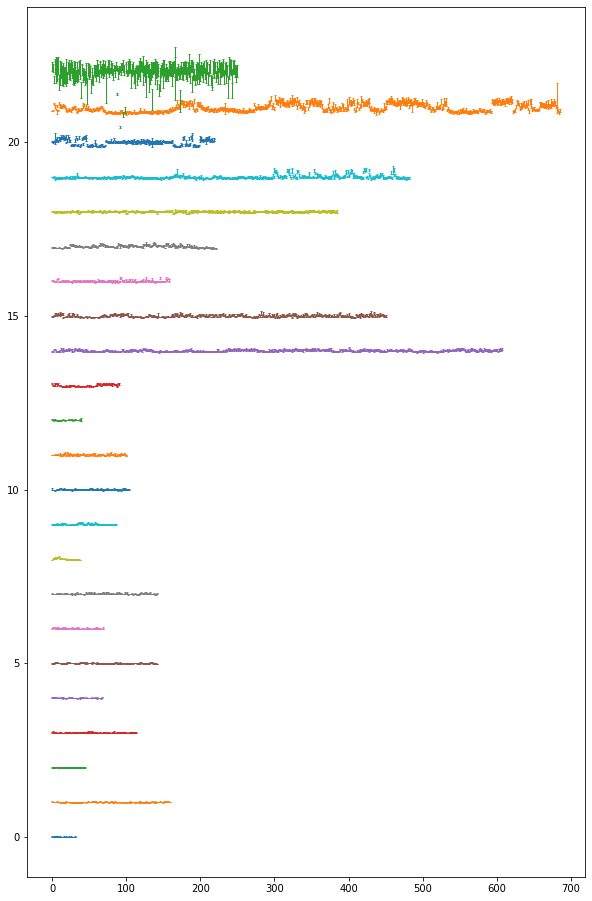

In [5]:
plt.figure(figsize=(10,16))

height = 0
for simbad_name in simbad_names_by_mean:
    lc = lcs_pc[simbad_name]
    readable_name = source_names_readable[simbad_name]
    print(simbad_name)
    
    if len(lc) == 0:
        continue
    elif lc['RATE'].max() > 2:
        continue
    elif len(lc) < 30:
        continue
    #plt.plot(lc['RATE']-np.mean(lc['RATE'])+height, label=simbad_name)
    xplot = np.arange(len(lc))
    yplot = lc['RATE']-np.mean(lc['RATE'])+height
    yerr  = lc['RATE_ERR']
    
    plt.errorbar(x=xplot, y=yplot, yerr=yerr, label=simbad_name, ls='none', lw=1.0, capsize=1.0)

    #plt.text(s=readable_name, x=len(lc['RATE'])+5, y=height)
    height += 1


#plt.legend()
#plt.axis('off') 
plt.show()

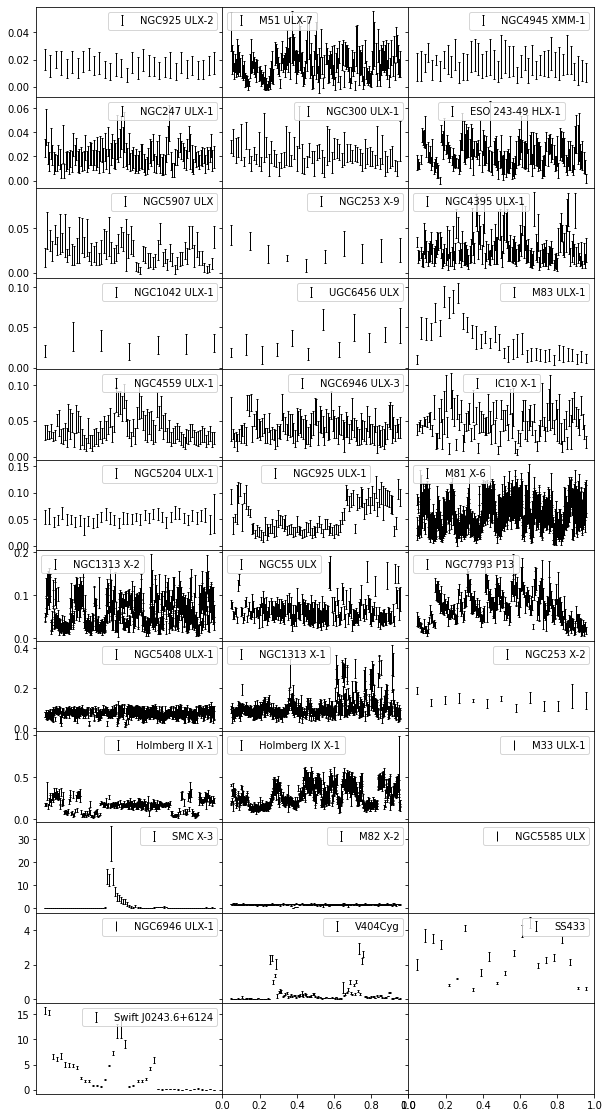

In [6]:

fig, ax = plt.subplots(int(len(simbad_names_by_mean)/3)+1,3, figsize=(10,20), sharey='row')
axes = ax.flatten()
i=0
for simbad_name in simbad_names_by_mean:
    lc = lcs_pc[simbad_name]
    readable_name = source_names_readable[simbad_name]
    
    xplot = np.arange(len(lc))
    yplot = lc['RATE']
    yerr  = lc['RATE_ERR']
    
    axes[i].errorbar(x=xplot, y=yplot, yerr=yerr, label=readable_name, ls='none', lw=1.0, capsize=1.0, color='black')
    #axes[i].text(s=readable_name, x=len(lc['RATE'])+5, y=np.mean(lc['RATE']))
    #axes[i].set_title(readable_name)
    axes[i].legend()
    #axes[i].axis('off')
    axes[i].get_xaxis().set_visible(False)
    i+=1
    
plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()

<ErrorbarContainer object of 3 artists>

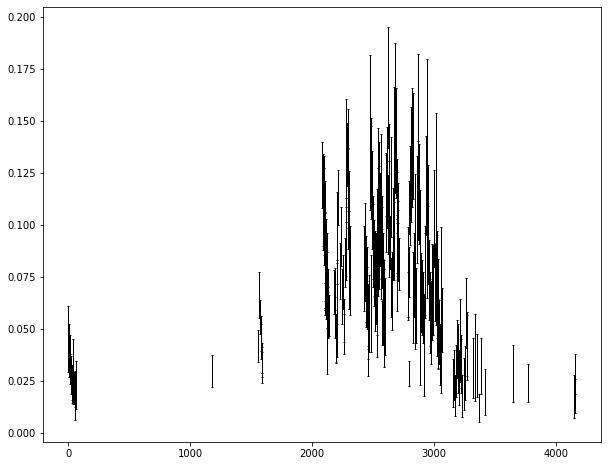

In [7]:
LC = lcs_pc['NAME_NGC_7793_P13']
plt.figure(figsize=(10,8))
plt.errorbar(LC['MJD_0'], LC['RATE'], yerr=LC['RATE_ERR'], ls='none', lw=1.0, capsize=1.0, color='black')
#plt.xlim(2200, 3500)